In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
class KNN():
  def __init__(self,k):
    self.k=k

  def train_dev_split(self,X,Y,train_size):
    m=int(train_size*X.shape[0])
    X_train=X[:m,:]
    Y_train=Y[:m]
    X_dev=X[m:,:]
    Y_dev=Y[m:]
    return X_train,Y_train,X_dev,Y_dev

  def Z_score_standardize(self,X,X_train_):
    Mean=np.mean(X_train_,axis=0)
    std=np.std(X_train_,axis=0)
    std[std==0]=1
    return (X-Mean)/std

  def min_max_normalize(self,X,X_train_):
    Min=np.min(X_train_,axis=0)
    Max=np.max(X_train_,axis=0)
    Range=Max-Min
    Range[Range==0]=1
    return (X-Min)/Range


  def predict(self,X_train,Y_train,X_test,Feature_Scaling="Z_score_standardization"):
    X_train_=np.copy(X)
    if Feature_Scaling=="Z_score_standardization":
      X_train_n=self.Z_score_standardize(X_train,X_train_)
      X_test_n=self.Z_score_standardize(X_test,X_train_)
    elif Feature_Scaling=="min_max_normalization":
      X_train_n=self.min_max_normalize(X_train,X_train_)
      X_train_n=self.min_max_normalize(X_test,X_train_)
    else:
      X_train_n=X_train
      X_test_n=X_test
    Y_train=Y_train.reshape(-1,1)
    a=-2*(X_train_n@(X_test_n.T))
    b=np.sum(np.square(X_train_n),axis=1).reshape(-1,1)
    c=np.sum(np.square(X_test_n.T),axis=0).reshape(1,-1)
    d_arr=a+b+c
    sorted_index_arr=np.argsort(d_arr,axis=0)[:self.k,:]
    sorted_k_labels=Y_train[sorted_index_arr].reshape(sorted_index_arr.shape[0],sorted_index_arr.shape[1])
    u,indices=np.unique(sorted_k_labels,return_inverse=True)
    return u[np.argmax(np.apply_along_axis(np.bincount,0,indices.reshape(sorted_k_labels.shape),None,np.max(indices)+1),axis=0)]

  def accuracy(self,Y_test,Y_pred):
    Y_test=Y_test.flatten()
    Y_pred=Y_pred.flatten()
    return np.sum(Y_test==Y_pred)/len(Y_test)*100



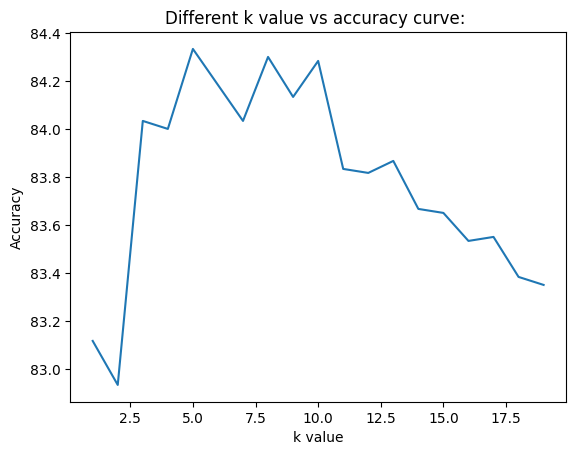